## TutorBrasil - Web Scraping

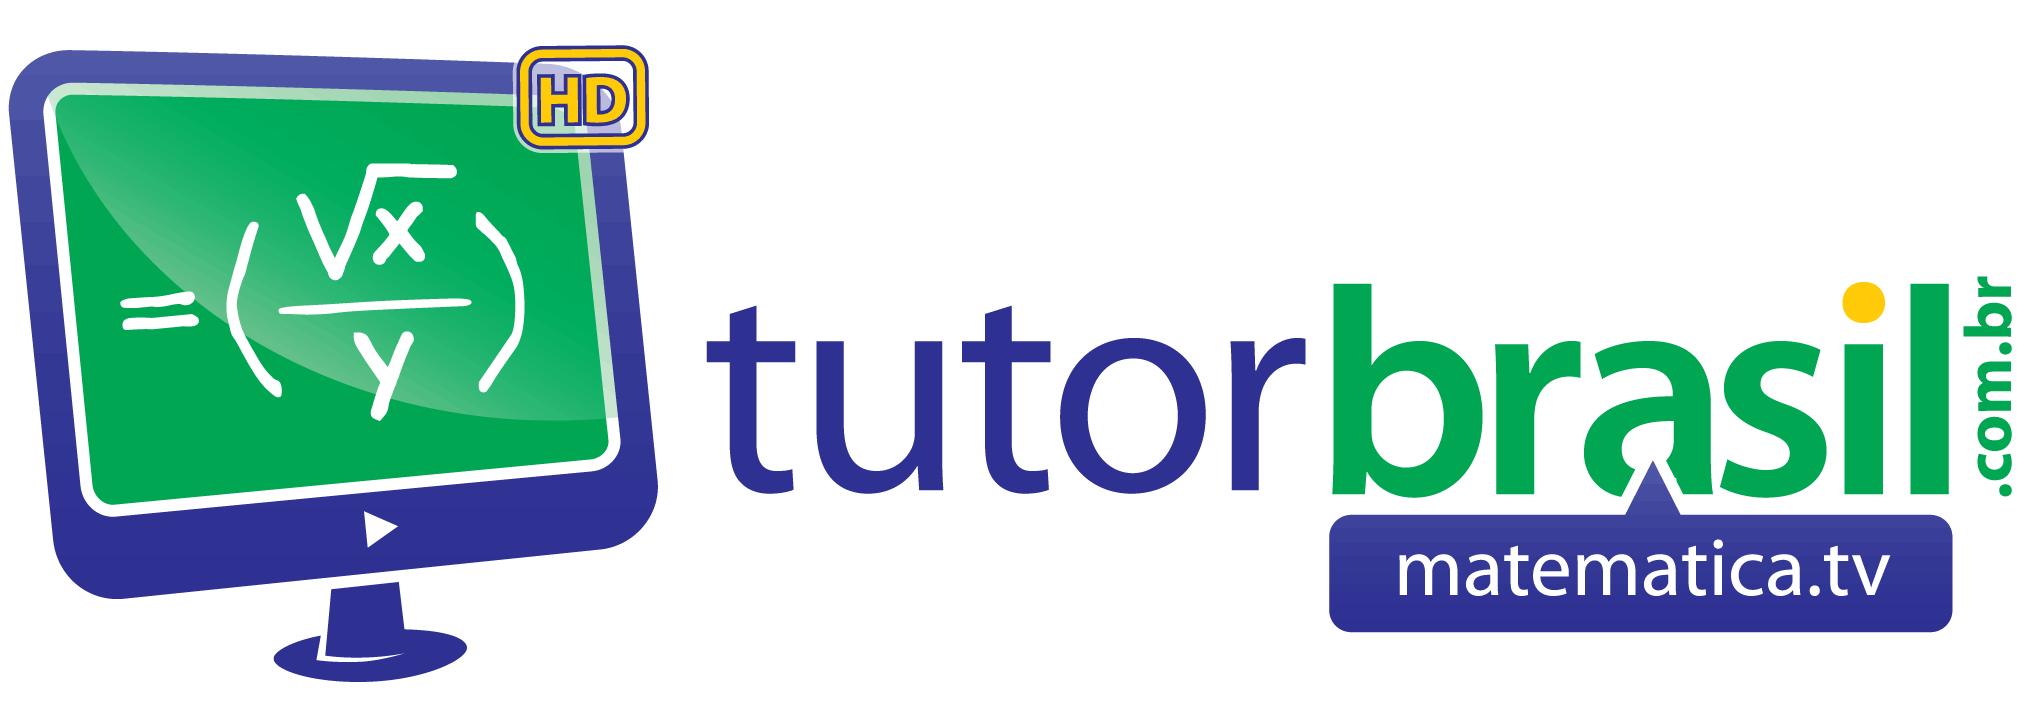

Enquanto estudava para vestibulares, conheci diversos fóruns, dentre eles, o TutorBrasil foi o que mais me chamou atenção. Com o intuito de colocar em prática o conhecimento que adquiri sobre Web Scraping, decidi fazer um projeto que fosse divertido e ao mesmo tempo me trouxesse aprendizado. 

Conheci o fórum há 7 anos, **postei mais de 1700 mensagens** e tive **438 respostas marcadas como solução**. Mas, uma dúvida que surgiu foi: como **estavam distribuída essas 438 respostas em relação aos assuntos?** Quantas eram de matemática, física, química, ou ainda, como estavam divididas nos subtópicos dessas áreas? 

Então o objetivo inicial desse projeto foi categorizar essas respostas de acordo com os tópicos e subtópicos da questão.


## Importação de pacotes

In [1]:
# Pacote requests
import requests

# Pacote BeautifulSoup
from bs4 import BeautifulSoup

# Pacote re
import re

# Pacote matplotlib
import matplotlib.pyplot as plt

## Configurando o Web scraping

In [2]:
# Configurando o agente do usuário 

headers = {
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15',
}

# Receber o HTTP Status Code

response = requests.get('https://www.tutorbrasil.com.br/forum', headers=headers)

# Verificar se o headers está adequado
print(response)


<Response [200]>


In [8]:
# Obtendo o HTML da página
soup = BeautifulSoup(response.text, 'lxml')

# Buscando os título das seções que estão dentro da tag 'a' com class 'forumtitle'
titulos = soup.find_all('a', class_='forumtitle' )

# Verificando os cinco primeiros títulos
for i in range(5):
    print(titulos[i])

<a class="forumtitle" href="./viewforum.php?f=71&amp;sid=684db2b0238adc1d064251c54c73877d">TutorBrasil no YouTube</a>
<a class="forumtitle" href="./viewforum.php?f=43&amp;sid=684db2b0238adc1d064251c54c73877d">Anúncios</a>
<a class="forumtitle" href="./viewforum.php?f=48&amp;sid=684db2b0238adc1d064251c54c73877d">Olá Mundo</a>
<a class="forumtitle" href="./viewforum.php?f=49&amp;sid=684db2b0238adc1d064251c54c73877d">Depoimentos</a>
<a class="forumtitle" href="./viewforum.php?f=50&amp;sid=684db2b0238adc1d064251c54c73877d">Sugestões de Melhorias</a>


É possível perceber que há um padrão, temos `?f=71` associado ao título `TutorBrasil no YouTube`, `?f=43` associado ao título `Anúncios` e assim por diante

In [14]:
# Criando um dicionário que vai associar cada código ao seu título
codigo_titulo = {}

for tag in titulos:
    # Extrair o código do fórum 
    match = re.search(r'\?f=(\d+)', str(tag))
    codigo = match.group(1)
   
    # Extrair o texto entre as tags <a> e </a>
    texto = re.search(r'>(.*?)</a>', str(tag))
    texto_titulo = texto.group(1)
 
    # Adicionar os dados do fórum ao dicionário
    codigo_titulo[codigo] = texto_titulo

# Verificando o dicionário

print(codigo_titulo)

{'71': 'TutorBrasil no YouTube', '43': 'Anúncios', '48': 'Olá Mundo', '49': 'Depoimentos', '50': 'Sugestões de Melhorias', '56': 'Off-Topic', '45': 'Maratonas de Matemática', '46': 'Maratonas de Física', '47': 'Maratonas de Química', '65': 'Gramática', '66': 'Interpretação de texto', '67': 'Redação em Inglês', '68': 'Traduções livres', '1': 'Pré-Vestibular', '3': 'Ensino Médio', '4': 'Ensino Fundamental', '8': 'Ensino Superior', '2': 'IME / ITA', '5': 'Concursos Públicos', '20': 'Olimpíadas', '28': 'Demonstrações', '40': 'Questões Perdidas', '53': 'Gramática', '54': 'Literatura', '55': 'Redação', '74': 'Interpretação de Textos', '12': 'Química Orgânica', '13': 'Físico-Química', '14': 'Química Geral', '16': 'IME/ITA', '39': 'Experimentos Interessantes', '29': 'Demonstrações', '32': 'Taxonomia', '33': 'Fisiologia, Histologia, Embriologia e Zoologia', '34': 'Reino Vegetal', '35': 'Reino Fungi, Reino Protista e Protozooses', '36': 'Reino Monera, Vírus e Parasitologia', '37': 'Genética, Cit

Temos chave-valor com valores repetidos, por exemplo a `'2': 'IME / ITA'` e `'16': 'IME/ITA'`. Isso acontece porque cada um desses valores está associado, inicialmente, à uma área específica.

Além disso, temos valores que representam apenas o ambiente da questão, como a ` '1': 'Pré-Vestibular'`, que verificando manualmente, podemos observar que está dentro da área de matemática.

Então, fazendo alterações para conseguir identificar as respectivas áreas, teremos o seguinte:

In [16]:
chaves_mat = ['1', '3', '4', '8', '2', '5', '20', '28', '40']

for chave in chaves_mat:
    if chave in codigo_titulo:
        codigo_titulo[chave] = "Matemática - " + codigo_titulo[chave]

chaves_qui = ['16', '39', '29']

for chave in chaves_qui:
    if chave in codigo_titulo:
        codigo_titulo[chave] = "Química - " + codigo_titulo[chave]

chaves_fis = ['15', '30', '41']

for chave in chaves_fis:
    if chave in codigo_titulo:
        codigo_titulo[chave] = "Física - " + codigo_titulo[chave]

# Verificando o dicionario
print(codigo_titulo)

{'71': 'TutorBrasil no YouTube', '43': 'Anúncios', '48': 'Olá Mundo', '49': 'Depoimentos', '50': 'Sugestões de Melhorias', '56': 'Off-Topic', '45': 'Maratonas de Matemática', '46': 'Maratonas de Física', '47': 'Maratonas de Química', '65': 'Gramática', '66': 'Interpretação de texto', '67': 'Redação em Inglês', '68': 'Traduções livres', '1': 'Matemática - Pré-Vestibular', '3': 'Matemática - Ensino Médio', '4': 'Matemática - Ensino Fundamental', '8': 'Matemática - Ensino Superior', '2': 'Matemática - IME / ITA', '5': 'Matemática - Concursos Públicos', '20': 'Matemática - Olimpíadas', '28': 'Matemática - Demonstrações', '40': 'Matemática - Questões Perdidas', '53': 'Gramática', '54': 'Literatura', '55': 'Redação', '74': 'Interpretação de Textos', '12': 'Química Orgânica', '13': 'Físico-Química', '14': 'Química Geral', '16': 'Química - IME/ITA', '39': 'Química - Experimentos Interessantes', '29': 'Química - Demonstrações', '32': 'Taxonomia', '33': 'Fisiologia, Histologia, Embriologia e Zoo

Então agora conseguiremos ter uma maior clareza dos dados.  

Para além disso, cada usuário tem seu próprio link para verificar as questões que ele resolveu e foram marcadas como soluções pelo autor da questão. 

Inicialmente, associado à minha conta, temos `https://www.tutorbrasil.com.br/forum/search.php?author_id=17295&sr=topics&only_solved=true`, que contém 15 páginas.

Passando para a página 2, obtemos

`https://www.tutorbrasil.com.br/forum/search.php?st=0&sk=t&sd=d&sr=topics&author_id=17295&only_solved=true&start=30`, o que nos sugere que poderemos iterar o start=30 a cada 30. De fato, indo para a página 3, obtemos 

`https://www.tutorbrasil.com.br/forum/search.php?st=0&sk=t&sd=d&sr=topics&author_id=17295&only_solved=true&start=60`, e assim por diante.

In [52]:
# URL base
iterar_url = 'https://www.tutorbrasil.com.br/forum/search.php?st=0&sk=t&sd=d&sr=topics&author_id=17295&only_solved=true&start={}'

# Lista para armazenar as informações coletadas
todas_materias = []

Um passo importante a ser notado é que cada questão resolvida, por exemplo a `https://www.tutorbrasil.com.br/forum/viewtopic.php?f=3&t=75222`, tem o mesmo padrão `?f=`que tínhamos quando criamos o dicionário com os respectivos `códigos: títulos`. E, de fato, podemos verificar que cada questão resolvida tem o código associado à sua área, que já está presente no dicionário. Com isso, basta pegar o número entre `?f=`e `&`

In [53]:
# Iterar as páginas a cada 30
for start in range(0, 440, 30):  
    url = iterar_url.format(start)

    # Fazer a requisição
    resolvidas = requests.get(url, headers=headers)

    # Verificar se a requisição foi bem-sucedida
    if resolvidas.status_code == 200:
        # Obter o código HTML
        soup2 = BeautifulSoup(resolvidas.text, 'lxml')

        # Encontrar todos os elementos 'a' com a classe 'topictitle'
        materias = soup2.find_all('a', class_='topictitle')

        # Adicionar as informações coletadas à lista
        todas_materias.extend(materias)
    else:
        print('Erro ao fazer a requisição:', resolvidas.status_code)
        break 

In [56]:
# Verificando os 5 primeiros

for i in range(5):
    print(todas_materias[i])

<a class="topictitle" href="./viewtopic.php?f=3&amp;t=75222&amp;sid=0265a2503b0850aab32965d6a443b42d">Polinômios</a>
<a class="topictitle" href="./viewtopic.php?f=9&amp;t=104789&amp;sid=0265a2503b0850aab32965d6a443b42d">Função da Aceleração no MHS</a>
<a class="topictitle" href="./viewtopic.php?f=3&amp;t=104777&amp;sid=0265a2503b0850aab32965d6a443b42d">Equação trigonométrica</a>
<a class="topictitle" href="./viewtopic.php?f=3&amp;t=104778&amp;sid=0265a2503b0850aab32965d6a443b42d">Equação trigonométrica 2</a>
<a class="topictitle" href="./viewtopic.php?f=1&amp;t=71072&amp;sid=0265a2503b0850aab32965d6a443b42d">FUVEST Função do 2º grau</a>


Queremos obter apenas os códigos, pois depois bastará fazer uma contagem para cada respectivo código. 

In [63]:
#Lista para armazenar os códigos
codigos_resolvidas = []

#Obtendo apenas os códigos
for a in todas_materias:
    href = a.get('href')
    match = re.search(r'\?f=(\d+)', href)
    codigos_resolvidas.append(match.group(1))

#Verificando os 10 primeiros

print(codigos_resolvidas[:10])

['3', '9', '3', '3', '1', '8', '5', '5', '3', '2']


In [64]:
# Verificando se a quantidade está correta
print(len(codigos_resolvidas))

438


In [66]:
# Contagem de ocorrências de cada código
contagem_codigos_resolvidos = {codigo: codigos_resolvidas.count(codigo) for codigo in codigos_resolvidas}

In [68]:
# Verificando a contagem
print(contagem_codigos_resolvidos)

{'3': 143, '9': 46, '1': 46, '8': 89, '5': 14, '2': 22, '20': 10, '4': 18, '23': 1, '10': 9, '14': 19, '12': 4, '13': 7, '53': 2, '11': 2, '24': 2, '16': 2, '38': 1, '15': 1}


In [70]:
#Obtendo os subtópicos que apresentam ao menos uma solução
materias = [codigo_titulo[codigo] for codigo in contagem_codigos_resolvidos]

#Transformando em lista a quantidade de questão resolvida para cada código
quantidades = list(contagem_codigos_resolvidos.values())

In [71]:
# Ordenar de forma decrescente a quantidade de questões resolvidas
materias_ordenadas = [m for qtd, m in sorted(zip(quantidades, materias), reverse=False)]
quantidades_ordenadas = sorted(quantidades, reverse=False)

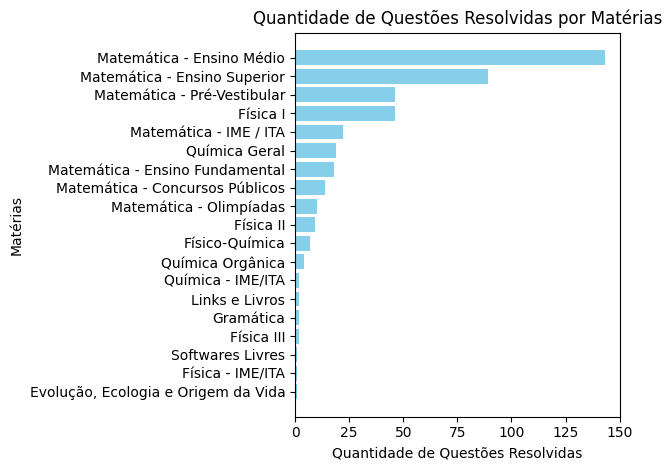

In [75]:
# Criar gráfico de barras horizontais
plt.barh(materias_ordenadas, quantidades_ordenadas, color='skyblue')
plt.xlabel('Quantidade de Questões Resolvidas')
plt.ylabel('Matérias')
plt.title('Quantidade de Questões Resolvidas por Matérias')
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

Com isso, conseguimos responder a pergunta inicial: "como estavam distribuída essas 438 respostas em relação aos assuntos?"

## Melhorias futuras

Um próximo passo seria usar um modelo LLM para identificar tags relacionados à cada questão. Por exemplo, se pegarmos uma questão qualquer resolvida em "Matemática - Ensino Médio",  e para resolver a questão era necessário saber geometria espacial, trigonometria e análise combinatória. A ideia é implementar um modelo que conseguisse identificar os assuntos chaves para resolver e separa-lás por tags. 

Então a questão assumiria as tags de `geometria-espacial`, `trigonometria` e `análise-combinatória`